In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
# Initialize lists for data storage
temps = []
humidity = []
cloudiness = []
wind = []
cities_found = []
country_found = []
lats_found = []
lngs_found = []
city_count = 1

# Loop through each city in original cities list
for city in cities:

    # Attempt to pull city data from the weather API
    try:
        city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
        response = requests.get(city_url).json()

        # If found, add data to respective lists
        temps.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lats_found.append(response['coord']['lat'])
        lngs_found.append(response['coord']['lon'])
        cities_found.append(city)
        country_found.append(response['sys']['country'])
        
        # Print the city and record number
        print(f'Record {city_count} for | {city}')
        city_count += 1        

    # If city is not found in API, print notice of that
    except:
        print(f'{city} not found. Continuing...')
        

Record 1 for | carnarvon
Record 2 for | ushuaia
Record 3 for | georgetown
Record 4 for | dikson
Record 5 for | punta arenas
Record 6 for | airai
Record 7 for | barrow
Record 8 for | jurm
Record 9 for | hasaki
Record 10 for | lagoa
Record 11 for | havelock
Record 12 for | rikitea
Record 13 for | puerto ayora
Record 14 for | ambilobe
Record 15 for | mataura
Record 16 for | coquimbo
Record 17 for | ribeira grande
Record 18 for | klaksvik
Record 19 for | bayshore gardens
Record 20 for | maceio
saleaula not found. Continuing...
sentyabrskiy not found. Continuing...
Record 21 for | hilo
Record 22 for | albany
Record 23 for | upernavik
Record 24 for | atuona
Record 25 for | longyearbyen
Record 26 for | lebu
barentsburg not found. Continuing...
Record 27 for | vaini
Record 28 for | jamestown
Record 29 for | dudinka
Record 30 for | kuroiso
Record 31 for | tasiilaq
Record 32 for | rio gallegos
Record 33 for | kapaa
Record 34 for | severo-kurilsk
Record 35 for | hobyo
Record 36 for | busselton
Re

Record 280 for | staryy nadym
Record 281 for | lunenburg
Record 282 for | mansa
Record 283 for | mehamn
Record 284 for | chuchkovo
Record 285 for | inhambane
Record 286 for | purificacion
Record 287 for | sorland
Record 288 for | rexburg
Record 289 for | lasa
Record 290 for | marsh harbour
Record 291 for | bouna
Record 292 for | pontian kecil
Record 293 for | kedrovyy
Record 294 for | nador
Record 295 for | humboldt
Record 296 for | chapais
Record 297 for | ejido hermosillo
Record 298 for | ishigaki
Record 299 for | omsukchan
Record 300 for | vung tau
Record 301 for | seddon
Record 302 for | missoula
Record 303 for | manjacaze
Record 304 for | flin flon
Record 305 for | koslan
Record 306 for | nalut
Record 307 for | saint-georges
Record 308 for | mikulasovice
Record 309 for | ramona
Record 310 for | lerwick
bargal not found. Continuing...
Record 311 for | talnakh
Record 312 for | shenkursk
qurbah not found. Continuing...
Record 313 for | comodoro rivadavia
Record 314 for | los llanos d

Record 565 for | touros
gurgan not found. Continuing...
Record 566 for | tessaoua
Record 567 for | toamasina
Record 568 for | yinchuan
Record 569 for | noumea
Record 570 for | bandarbeyla
Record 571 for | meulaboh
chupei not found. Continuing...
Record 572 for | khurai
Record 573 for | vorontsovka
Record 574 for | nanakuli
Record 575 for | suntar
Record 576 for | nokaneng
Record 577 for | kushima
Record 578 for | yar-sale
Record 579 for | pasni
Record 580 for | sechura
Record 581 for | dukat
Record 582 for | osinovo
Record 583 for | bloomington
Record 584 for | jamsa


In [4]:
# print(f'{len(temps)}, {len[lats_found]}, {len(humidity)}, {len(cloudiness)}, {len(wind)}, {len(cities_found)}')

# Create Dataframe
weather_df = pd.DataFrame({'City':cities_found,
                           'Country':country_found,
                           'Latitude':lats_found,
                           'Longitude':lngs_found,
                           'Temperature (F)':temps,
                           'Humidity (%)':humidity,
                           'Cloudiness (%)':cloudiness,
                           'Wind Speed (mph)':wind})
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,carnarvon,AU,-24.8667,113.6333,69.80,52,0,8.19
1,ushuaia,AR,-54.8000,-68.3000,42.80,87,75,8.05
2,georgetown,MY,5.4112,100.3354,76.24,94,40,4.61
3,dikson,RU,73.5069,80.5464,31.80,98,100,17.60
4,punta arenas,CL,-53.1500,-70.9167,44.29,93,75,2.30


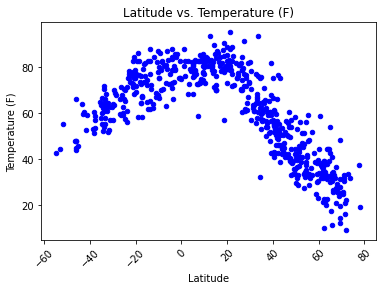

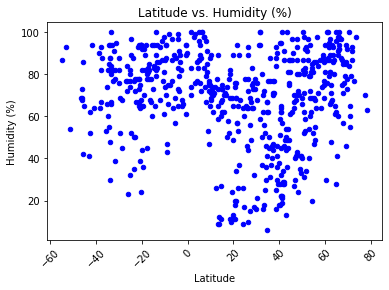

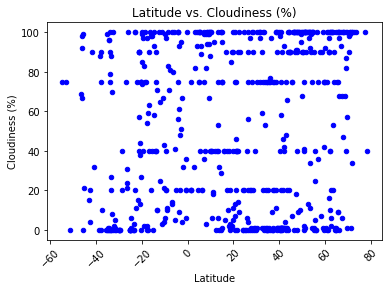

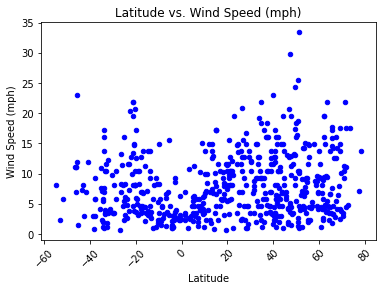

In [5]:
# Create Scatter Plot for Temp (F) vs Latitude
cols = ['Temperature (F)','Humidity (%)','Cloudiness (%)','Wind Speed (mph)']

for col in cols:
    weather_df.plot.scatter(x='Latitude',y=col,c='Blue',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col}', rot=45)
    plt.savefig(f'output_data/Figure_{col}')


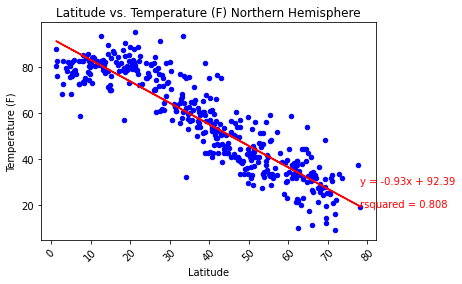

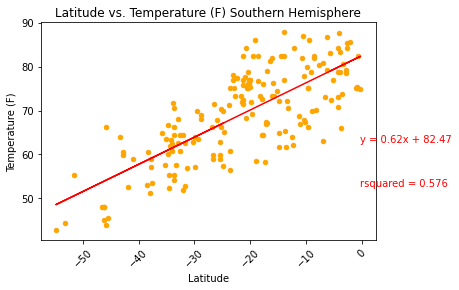

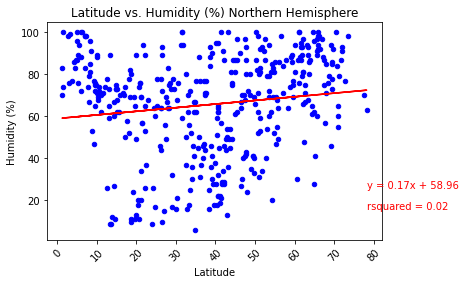

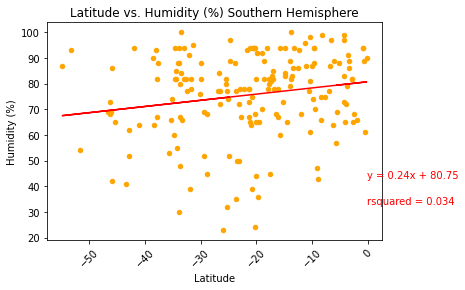

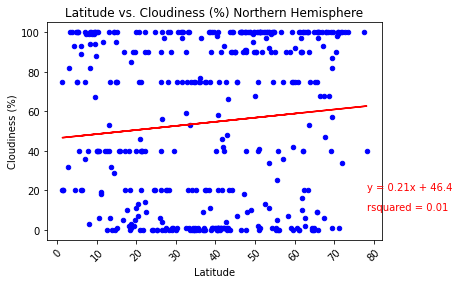

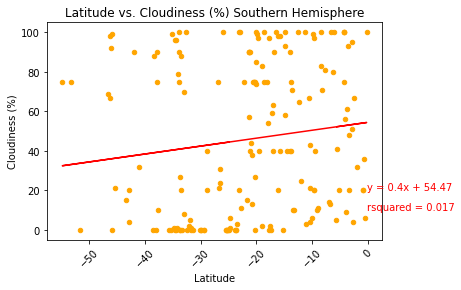

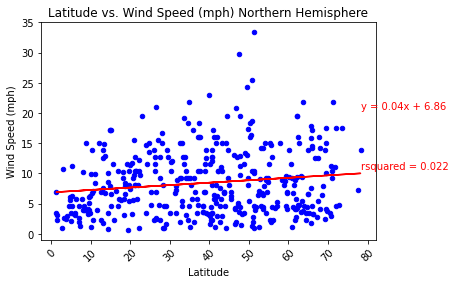

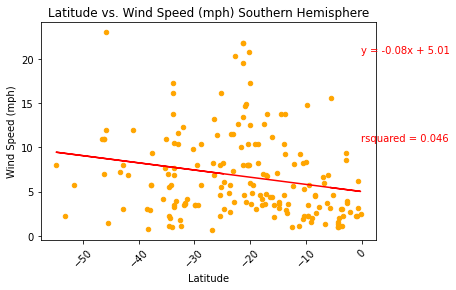

In [6]:
north_df = weather_df.loc[weather_df['Latitude'] > 0,:]
south_df = weather_df.loc[weather_df['Latitude'] < 0,:]

for col in cols:
    
    # Northern Hemisphere Analysis
    x_data_n = north_df['Latitude']
    y_data_n = north_df[col]
    correlation = st.pearsonr(x_data_n, y_data_n)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data_n, y_data_n)
    regress_values = x_data_n * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    # Plotting and formatting
    north_df.plot.scatter(x='Latitude',y=col,c='Blue',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col} Northern Hemisphere', rot=45)
    plt.plot(x_data_n,regress_values,'r')
    plt.annotate(line_eq, (max(x_data_n),min(y_data_n)+20), fontsize=10, color='red')
    plt.annotate(f"rsquared = {round(rvalue**2,3)}", (max(x_data_n),min(y_data_n)+10), fontsize=10, color='red')
    
    # Southern Hemisphere Analysis
    x_data_s = south_df['Latitude']
    y_data_s = south_df[col]
    correlation = st.pearsonr(x_data_s, y_data_s)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data_s, y_data_s)
    regress_values = x_data_s * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

    # Plotting and formatting
    south_df.plot.scatter(x='Latitude',y=col,c='Orange',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col} Southern Hemisphere', rot=45)
    plt.plot(x_data_s,regress_values,'r')
    plt.annotate(line_eq, (max(x_data_s),min(y_data_s)+20), fontsize=10, color='red')
    plt.annotate(f"rsquared = {round(rvalue**2,3)}", (max(x_data_s),min(y_data_s)+10), fontsize=10, color='red')


## HEMISPHERE WEATHER ANALYSIS

### The first set of graphs shows the relationship between temperature and latitude in each hemisphere. The data shows that there is a strong correlation between latitude and temperature in both north and south hemispheres of the earth. The r-squared values for each fit in north and south hemispheres are 0.794 and 0.593, respectively.

### The second, third, and fourth sets of graphs shows the relationship between latitude and humidity, cloudiness, and windspeed, respectively, in each hemisphere. None of these graphs show any correlation between latitude and the respective weather measurement. None of the r-squared values for each fit are near 0.60 which would indicate a correlation between the two variables

In [7]:
# Write all data to csv
weather_df.to_csv(output_data_file)